In [8]:
import pandas as pd
aapl = pd.read_csv("/Users/savvastantalidis/Documents/Python/Udemy Python-Finance-QuantConnect/Python-Finance-QuantConnect/06-Financial-Concepts-with-Python/apple_2010.csv", index_col="Date")
msft = pd.read_csv("/Users/savvastantalidis/Documents/Python/Udemy Python-Finance-QuantConnect/Python-Finance-QuantConnect/06-Financial-Concepts-with-Python/msft.csv", index_col="Date")

In [9]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
...,...,...,...,...,...,...
2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700
2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700


# Modern Portfolio Theory

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

COST = pd.read_csv("/Users/savvastantalidis/Documents/Python/Udemy Python-Finance-QuantConnect/Python-Finance-QuantConnect/06-Financial-Concepts-with-Python/COST.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

# WALMART 
WMT = pd.read_csv("/Users/savvastantalidis/Documents/Python/Udemy Python-Finance-QuantConnect/Python-Finance-QuantConnect/06-Financial-Concepts-with-Python/WMT.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

# TARGET
TGT = pd.read_csv("/Users/savvastantalidis/Documents/Python/Udemy Python-Finance-QuantConnect/Python-Finance-QuantConnect/06-Financial-Concepts-with-Python/TGT.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

# DOLLAR GENERAL
DG = pd.read_csv("/Users/savvastantalidis/Documents/Python/Udemy Python-Finance-QuantConnect/Python-Finance-QuantConnect/06-Financial-Concepts-with-Python/DG.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

In [11]:
port_df = pd.concat([COST,WMT,TGT,DG], axis = 1)
port_df.columns = ['COST', 'WMT', 'TGT', 'DG']
#calculate daily returns
port_df_returns = port_df.pct_change(1).dropna()
port_df_returns

,COST,WMT,TGT,DG
Date,,,,
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
2016-09-13,-0.006263,-0.006672,-0.005195,-0.019368
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


<AxesSubplot:xlabel='Date'>

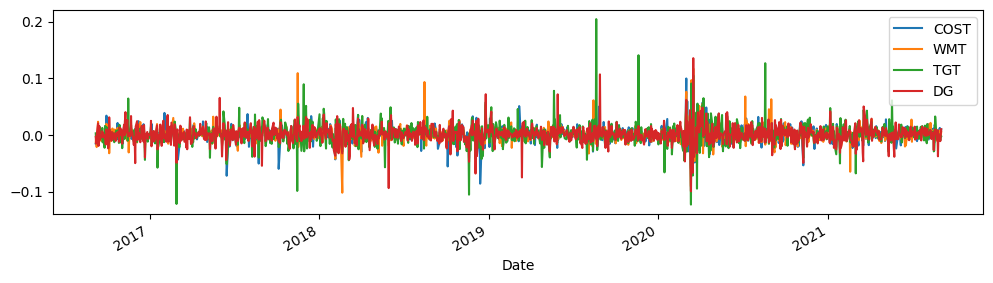

In [12]:
#we can see the volatility of the stocks
port_df_returns.plot(figsize = (12,3))

<AxesSubplot:ylabel='Frequency'>

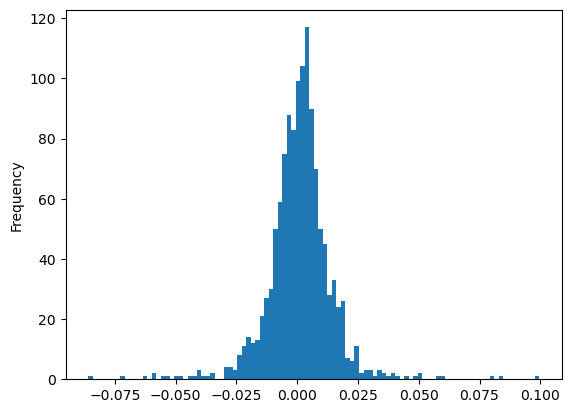

In [13]:
#distribution of single stock
port_df_returns['COST'].plot(kind = 'hist', bins = 100)

In [14]:
#calculate the cumulative return on each day

cumul_returns = (1+port_df_returns).cumprod() -1
cum_percent_returns = 100*cumul_return
cum_percent_returns.plot()

NameError: name 'cumul_return' is not defined

In [15]:
#calculate the returns of a portfolio depending on the weight we provide
np.dot([1,0,0,0],port_df_returns.transpose()) #that is a portfolio on which we invested everyting on the first row of the table

array([-0.01531071, -0.01394238, -0.01804909, ..., -0.00096507,
        0.0022613 ,  0.00974768])

In [16]:
np.dot([0.5,0,0.25,0.25], port_df_returns.transpose()) #different allocation of weight

array([-0.00781003, -0.01372145, -0.01099856, ..., -0.00558652,
        0.00026645,  0.00685398])

In [17]:
np.dot([0.25,0.25,0.25,0.25], port_df_returns.transpose()) #equal weighted portfolio

number_of_holdings = len(port_df_returns.columns)
equal_weights = number_of_holdings *[1/number_of_holdings]
equal_weighted_portfolio_returns = np.dot(equal_weights,port_df_returns.transpose())

In [18]:
equal_weighted_portfolio_returns

array([-0.00720156, -0.01103371, -0.01181137, ..., -0.00466819,
       -0.00083906,  0.00573659])

In [19]:
cum_equal_weighted_portfolio_returns = np.dot(equal_weights, cum_percent_returns.transpose())

df_cewpr = pd.Series(cum_equal_weighted_portfolio_returns, index = cum_percent_returns.index)
df_cewpr.plot(label = 'cumulative returns equaly weighted')
plt.legend()

NameError: name 'cum_percent_returns' is not defined

# Monte Carlo Simulation


In [20]:
#we calculate how much we would have left from previous days change. 

port_df/port_df.shift(1)
#we calculate the log returns 
log_port_returns = np.log(port_df/port_df.shift(1))
log_port_returns 

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,-0.015429,-0.012960,0.002849,-0.003478
2016-09-08,-0.014040,-0.003197,-0.012021,-0.015166
2016-09-09,-0.018214,-0.021530,-0.006644,-0.001275
2016-09-12,0.006548,0.023060,0.004338,0.020268
...,...,...,...,...
2021-08-27,0.002290,-0.005649,0.000883,-0.002882
2021-08-30,0.012336,0.008021,0.000722,0.000488
2021-08-31,-0.000966,0.002705,-0.009590,-0.010931


In [21]:
log_port_returns.mean()


COST    0.000943
WMT     0.000648
TGT     0.001113
DG      0.000948
dtype: float64

In [22]:
log_port_returns.mean()*weights

NameError: name 'weights' is not defined

In [23]:
n = len(log_port_returns.columns)
weights = np.random.random(n)
weights = weights/np.sum(weights)
weights

array([0.37577383, 0.15974183, 0.12436775, 0.34011659])

In [24]:
def generate_weights(n):
    weights = np.random.random(n)
    return weights/np.sum(weights)

#calculate the sum of the mean of the returns which are multiplied with their weight
#then multiply all that with number of trading days
def calculate_returns(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252

In [25]:
#calculate the covariance matrix
log_port_returns.cov()

,COST,WMT,TGT,DG
COST,0.000176,0.000107,0.000120,0.000104
WMT,0.000107,0.000187,0.000121,0.000108
TGT,0.000120,0.000121,0.000370,0.000170
DG,0.000104,0.000108,0.000170,0.000248


In [26]:
def calculate_volatility(weights, log_returns_cov):
    annualized_cov = np.dot(log_returns_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [27]:
np.dot(log_port_returns.cov(),weights)

array([0.00013388, 0.00012199, 0.00016833, 0.00016179])

In [28]:
log_port_returns.cov()*252

,COST,WMT,TGT,DG
COST,0.044451,0.027087,0.030338,0.026268
WMT,0.027087,0.047173,0.030380,0.027191
TGT,0.030338,0.030380,0.093319,0.042807
DG,0.026268,0.027191,0.042807,0.062431


In [29]:
volatility = calculate_volatility(weights,log_port_returns.cov())

In [358]:
volatility

0.1993997201565176

In [359]:
log_port_returns = np.log(port_df/port_df.shift(1))
log_returns_covariance = log_port_returns.cov()*252

In [360]:
mc_portfolio_returns = []
mc_portfolio_volatility = []
mc_weights = []

for sim in range(30000):
    weights = generate_weights(n=4)
    
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_port_returns))
    mc_portfolio_volatility.append(calculate_volatility(weights,log_returns_covariance))
print('finish')

finish


In [361]:
mc_sharp_ratio = np.array(mc_portfolio_returns)/np.array(mc_portfolio_volatility)

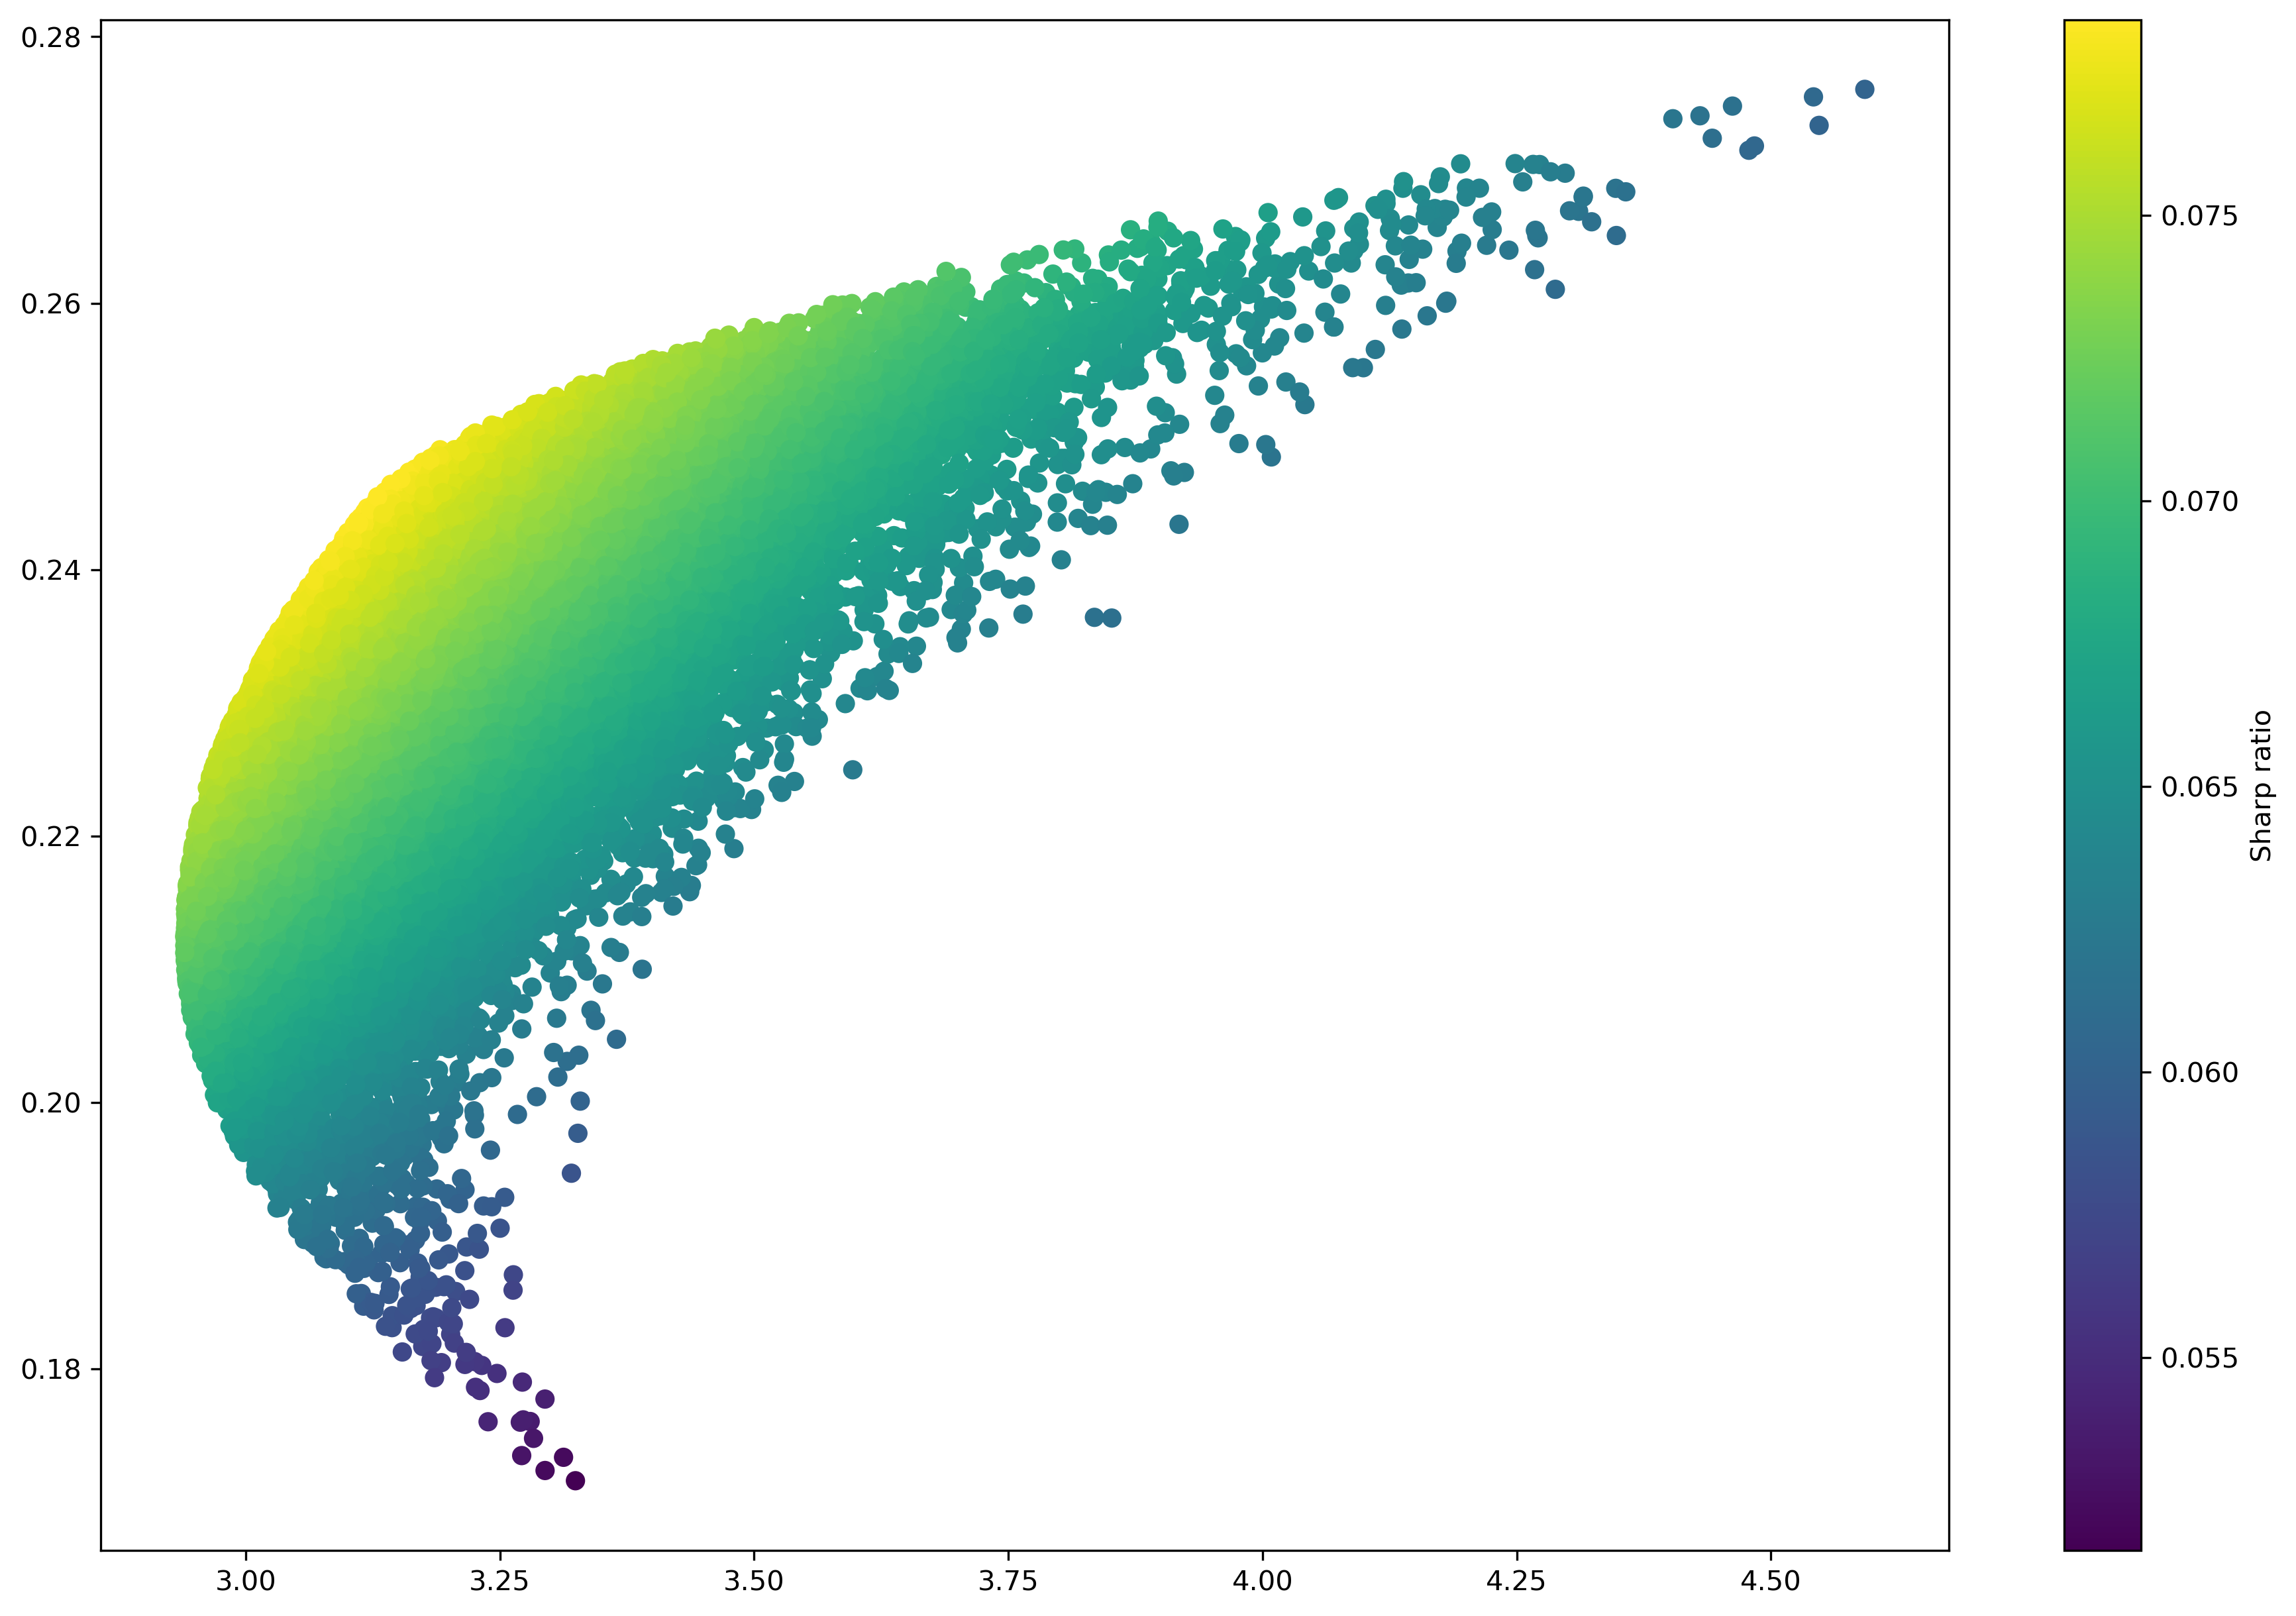

In [362]:
plt.figure(dpi=300,figsize = (15,10))
plt.scatter(mc_portfolio_volatility,mc_portfolio_returns, c = mc_sharp_ratio)
plt.colorbar(label = 'Sharp ratio')

In [325]:
best_weights = np.argmax(mc_sharp_ratio)

In [326]:
mc_weights[best_weights]

array([0.58527125, 0.00973377, 0.18042663, 0.22456836])

# Minimization



In [363]:
def funciton_to_minimize(weights):
    return -1*calculate_returns(weights,log_port_returns)/calculate_volatility(weights,log_returns_covariance*252)



In [364]:
bounds = tuple((0,1) for i in range(n))

In [365]:
bounds
sum_constrait = ({'type':'eq', 'fun':lambda weights:np.sum(weights)-1})
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [366]:
from scipy.optimize import minimize
minimize(fun = funciton_to_minimize,
        x0 = equal_weights,
        bounds = bounds,
        constraints = sum_constrait)

     fun: -0.004937804672948074
     jac: array([ 1.60235213e-05,  2.33589904e-04, -1.72732922e-04,  6.14301534e-05])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.59094175, 0.        , 0.14774968, 0.26130857])

In [367]:
expected_returns_range = np.linspace(0.18,0.28,100) #we define the range expected returns we want and how many those we want to have (100)
constraints = ({'type':'eq','fun':lambda weights:np.sum(weights)-1}, #with the lambda we define that sum of weights should be equal with 1
              {'type':'eq','fun':lambda weights: calculate_returns(weights,log_port_returns)-possible_return})
log_returns_covariance
def calculate_volatility_ann(weights):
    annualized_cov = np.dot(log_returns_covariance*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

frontier_vol = []
portfolio_holding = []
for possible_return in expected_returns_range: #the possible_return should match with the variable inside the contraints
    result = minimize(fun = calculate_volatility_ann,x0 = equal_weights, bounds = bounds,constraints = constraints)

    frontier_vol.append(result['fun'])
    portfolio_holding.append(result['x'])


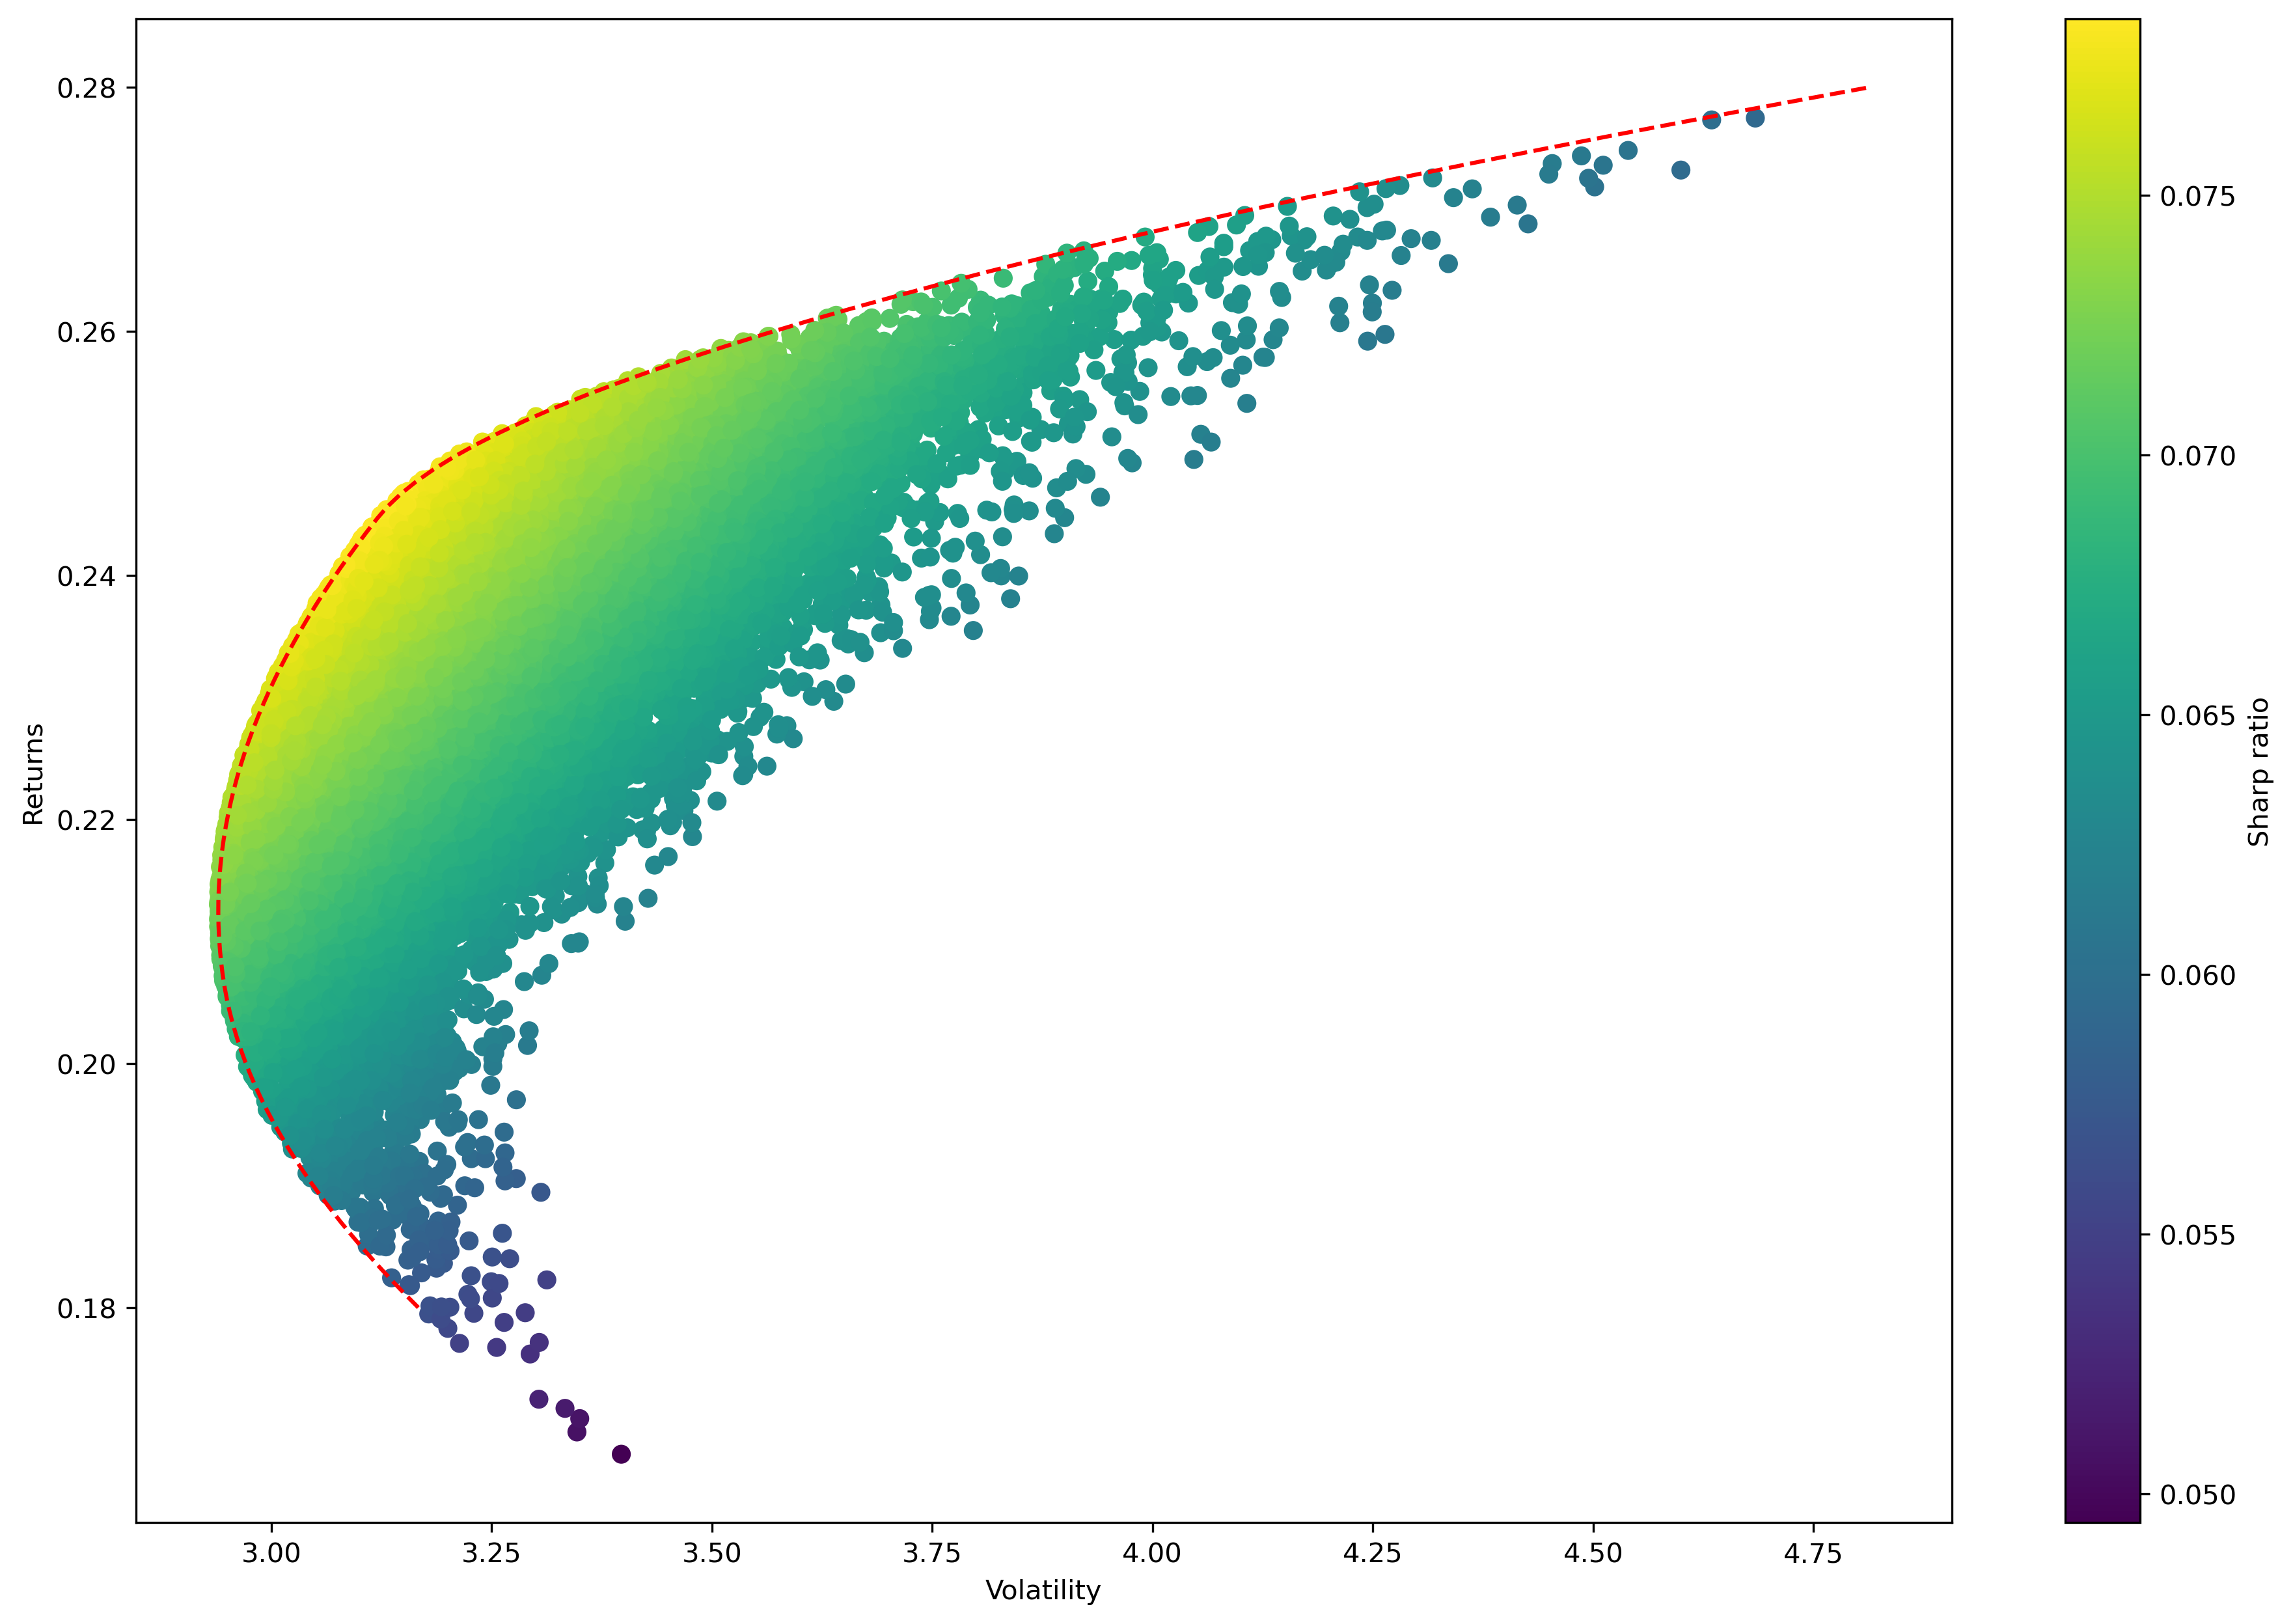

In [332]:
plt.figure(dpi=300,figsize = (15,10))
plt.scatter(mc_portfolio_volatility,mc_portfolio_returns, c = mc_sharp_ratio)
plt.colorbar(label = 'Sharp ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')

plt.plot(frontier_vol,expected_returns_range, color = 'red', ls = '--')

# CAMP

In [537]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [538]:
aapl = pd.read_csv("/Users/savvastantalidis/Documents/Python/Udemy Python-Finance-QuantConnect/Python-Finance-QuantConnect/06-Financial-Concepts-with-Python/apple_2010.csv",index_col='Date',parse_dates=True)
amzn = pd.read_csv("/Users/savvastantalidis/Documents/Python/Udemy Python-Finance-QuantConnect/Python-Finance-QuantConnect/06-Financial-Concepts-with-Python/amazon_2010.csv",index_col='Date',parse_dates=True)
ge = pd.read_csv("/Users/savvastantalidis/Documents/Python/Udemy Python-Finance-QuantConnect/Python-Finance-QuantConnect/06-Financial-Concepts-with-Python/GE_2010.csv",index_col='Date',parse_dates=True)
vix = pd.read_csv("/Users/savvastantalidis/Documents/Python/Udemy Python-Finance-QuantConnect/Python-Finance-QuantConnect/06-Financial-Concepts-with-Python/VIX_2010.csv",index_col='Date',parse_dates=True)
sp500 = pd.read_csv("/Users/savvastantalidis/Documents/Python/Udemy Python-Finance-QuantConnect/Python-Finance-QuantConnect/06-Financial-Concepts-with-Python/sp500_2010.csv",index_col='Date',parse_dates=True)

# compute_cumulative - Function
    * we calculate the the absolute return based on initail value of the column we calculate and the last value

In [539]:
def compute_cumulative(df, column,get_absolute:bool = True,**kwargs):
    initial_price = df[column].iloc[0]
    final_price = df[column].iloc[-1]
    if get_absolute == True:
        return final_price - initial_price
    else:
        return ((final_price/initial_price)-1)*100

## calculate the cumulative absolute change of the price throughout the period on daily bases with starting point
##the first day of our data
def crete_cumulative_abs(df,column):
    df['Cumulative ' + column] = df[column] - df[column].iloc[0] 

    return df
def calc_cum_perc(df):
    df['cumulative_abs'] = ((df['Adj Close'] - df['Adj Close'].iloc[0])/df['Adj Close'].iloc[0])*100
    return df

def beta_and_alpha(asset_df, benchmark_df):
    
    beta,alpha,_,_,_= linregress(benchmark_df, asset_df)
    return beta, alpha

In [540]:
# aapl['cumulative_abs'] = ((aapl['Adj Close'] - aapl['Adj Close'].iloc[0])/aapl['Adj Close'].iloc[0])*100
# aapl

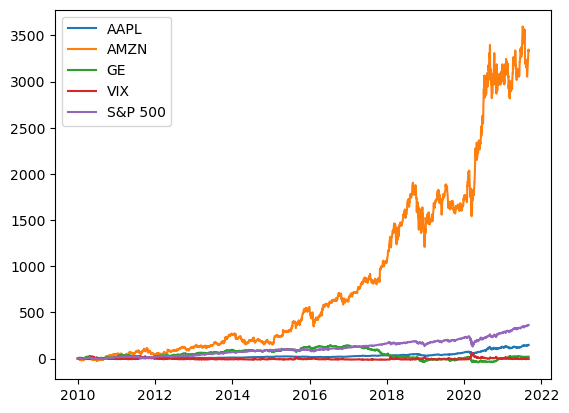

In [541]:
aapl = crete_cumulative_abs(aapl, 'Adj Close')
amzn = crete_cumulative_abs(amzn,'Adj Close')
ge = crete_cumulative_abs(ge,'Adj Close')
vix  =crete_cumulative_abs(vix,'Adj Close')
sp500 = crete_cumulative_abs(sp500,'Adj Close')

plt.plot(aapl['Cumulative Adj Close'], label = 'AAPL')
plt.plot(amzn['Cumulative Adj Close'], label = 'AMZN')
plt.plot(ge['Cumulative Adj Close'], label = 'GE')
plt.plot(vix['Cumulative Adj Close'], label = 'VIX')
plt.plot(sp500['Cumulative Adj Close'], label = 'S&P 500')

plt.legend()
plt.show()

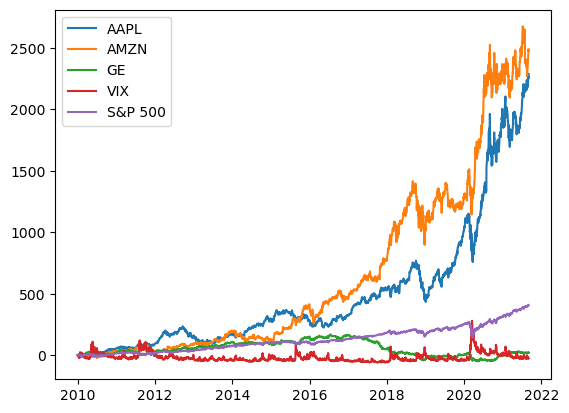

In [542]:
aapl = calc_cum_perc(aapl)
amzn = calc_cum_perc(amzn)
ge = calc_cum_perc(ge)
vix  =calc_cum_perc(vix)
sp500 = calc_cum_perc(sp500)

plt.plot(aapl['cumulative_abs'], label = 'AAPL')
plt.plot(amzn['cumulative_abs'], label = 'AMZN')
plt.plot(ge['cumulative_abs'], label = 'GE')
plt.plot(vix['cumulative_abs'], label = 'VIX')
plt.plot(sp500['cumulative_abs'], label = 'S&P 500')

plt.legend()
plt.show()

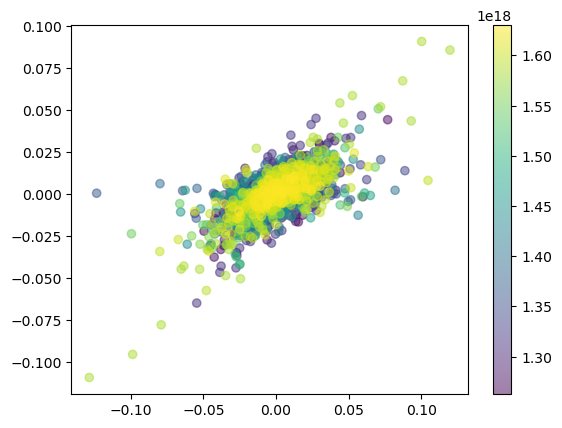

In [543]:
aapl['Daily Returns'] = aapl['Adj Close'].pct_change(1)
sp500['Daily Returns'] = sp500['Adj Close'].pct_change(1)
amzn['Daily Returns'] = amzn['Adj Close'].pct_change(1)
ge['Daily Returns'] = ge['Adj Close'].pct_change(1)
vix['Daily Returns'] = vix['Adj Close'].pct_change(1)

plt.scatter(aapl['Daily Returns'],sp500['Daily Returns'], alpha = 0.5, c = aapl.index, cmap='viridis')
plt.colorbar()
plt.show()

In [544]:
aapl = aapl.dropna()
vix = vix.dropna()
amzn= amzn.dropna()
ge= ge.dropna()
vix= vix.dropna()
sp500 = sp500.dropna()

In [545]:
from scipy.stats import linregress

In [577]:
def beta_and_alpha(asset_df, benchmark_df):
    
    beta,alpha,_,_,_= linregress(benchmark_df, asset_df)
    return beta, alpha

In [578]:
aapl

,Open,High,Low,Close,Adj Close,Volume,Cumulative Adj Close,cumulative_abs,Daily Returns
Date,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,0.100582,1.556515,0.015565
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,0.111927,1.732071,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,0.007360,0.113904,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,-0.004601,-0.071201,-0.001849
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,0.038331,0.593168,0.006648
...,...,...,...,...,...,...,...,...,...
2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700,146.657987,2269.541849,0.030417
2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100,145.367993,2249.579119,-0.008425
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700,146.047986,2260.102050,0.004479


In [579]:
beta_and_alpha(sp500['Daily Returns'], aapl['Daily Returns'])

(0.3989344065127247, 0.00011794623107411943)

In [574]:
aapl

,Open,High,Low,Close,Adj Close,Volume,Cumulative Adj Close,cumulative_abs,Daily Returns
Date,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,0.100582,1.556515,0.015565
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,0.111927,1.732071,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,0.007360,0.113904,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,-0.004601,-0.071201,-0.001849
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,0.038331,0.593168,0.006648
...,...,...,...,...,...,...,...,...,...
2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700,146.657987,2269.541849,0.030417
2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100,145.367993,2249.579119,-0.008425
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700,146.047986,2260.102050,0.004479


In [575]:
sp500

,Open,High,Low,Close,Adj Close,Volume,Cumulative Adj Close,cumulative_abs,Daily Returns
Date,,,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,90.493996,118944600,1.509148,1.695960,0.016960
2010-01-05,113.260002,113.680000,112.849998,113.629997,90.733574,111579900,1.748726,1.965195,0.002647
2010-01-06,113.519997,113.989998,113.430000,113.709999,90.797455,116074400,1.812607,2.036984,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,91.180725,131091100,2.195877,2.467698,0.004221
2010-01-08,113.889999,114.620003,113.660004,114.570000,91.484131,126402800,2.499283,2.808661,0.003328
...,...,...,...,...,...,...,...,...,...
2021-08-30,450.970001,453.070007,450.709991,452.230011,452.230011,48357400,363.245163,408.210129,0.004398
2021-08-31,452.130005,452.489990,450.920013,451.559998,451.559998,59300200,362.575150,407.457177,-0.001482
2021-09-01,452.559998,453.109985,451.549988,451.799988,451.799988,48721400,362.815140,407.726875,0.000531
